In [1]:
import pandas as pd
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
fpl_data = pd.read_csv("data/FPL 22.csv")
fpl_data.head()

,id,name,now_cost,cost,position,team,clean_sheets_per_90,threat_rank_type,expected_assists_per_90,expected_assists,...,threat_rank,ep_this,transfers_in,bps,goals_conceded_per_90,selected_by_percent,influence_rank_type,points_per_game_rank_type,clean_sheets,now_cost_rank
0,176,Asmir Begović,38,3.8,GKP,Everton,1.00,7,0.00,0.00,...,478,0.5,151666,30,0.00,0.8,36,1,1,763
1,318,Erling Haaland,124,12.4,FWD,Man City,0.42,1,0.10,3.11,...,1,5.4,7833248,1040,0.85,78.4,1,1,13,2
2,324,Stefan Ortega Moreno,37,3.7,GKP,Man City,0.67,3,0.00,0.00,...,473,4.3,315760,90,0.33,1.5,28,2,2,777
3,427,Harry Kane,115,11.5,FWD,Spurs,0.29,2,0.11,4.01,...,2,9.2,7381740,1008,1.64,32.7,2,2,11,4
4,283,Mohamed Salah,131,13.1,MID,Liverpool,0.36,1,0.19,7.03,...,3,9.3,6974743,651,1.23,37.2,1,1,13,1


In [3]:
avg_mins = fpl_data['minutes'].mean()
avg_mins

962.8714652956298

In [4]:
fpl_avg_players = fpl_data[fpl_data['minutes'] >= avg_mins]
fpl_avg_players.head()

,id,name,now_cost,cost,position,team,clean_sheets_per_90,threat_rank_type,expected_assists_per_90,expected_assists,...,threat_rank,ep_this,transfers_in,bps,goals_conceded_per_90,selected_by_percent,influence_rank_type,points_per_game_rank_type,clean_sheets,now_cost_rank
1,318,Erling Haaland,124,12.4,FWD,Man City,0.42,1,0.10,3.11,...,1,5.4,7833248,1040,0.85,78.4,1,1,13,2
3,427,Harry Kane,115,11.5,FWD,Spurs,0.29,2,0.11,4.01,...,2,9.2,7381740,1008,1.64,32.7,2,2,11,4
4,283,Mohamed Salah,131,13.1,MID,Liverpool,0.36,1,0.19,7.03,...,3,9.3,6974743,651,1.23,37.2,1,1,13,1
5,335,Marcus Rashford,72,7.2,MID,Man Utd,0.41,2,0.09,2.86,...,4,2.7,10735832,530,1.22,37.8,7,2,13,33
6,301,Kevin De Bruyne,121,12.1,MID,Man City,0.37,27,0.51,13.69,...,44,1.7,7222275,742,0.86,25.5,5,4,10,3


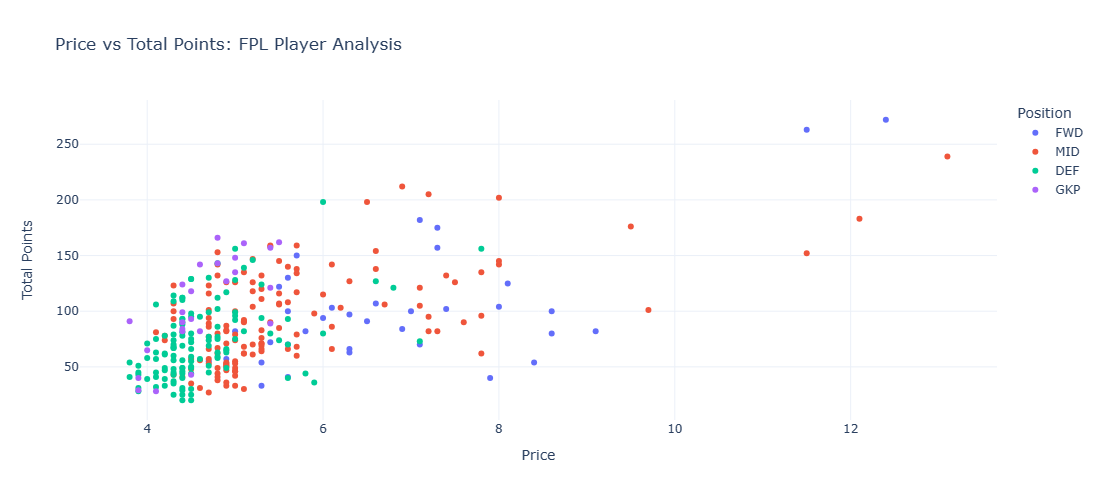

In [5]:
fig = px.scatter(fpl_avg_players, x='cost', y='total_points', hover_data={'name', 'team'}, color='position',
                template='plotly_white', color_continuous_scale="Agsunset", title='Price vs Total Points: FPL Player Analysis', 
                labels={'total_points': 'Total Points', 'cost': 'Price', 'selected_by_percent': 'Selected Percentage',
                       'position': 'Position', 'team': 'Team', 'name': 'Player Name'})
fig.update_layout(height=500)
fig.show()

In [6]:
goalkeepers = fpl_avg_players[fpl_avg_players['position']=='GKP']
defenders = fpl_avg_players[fpl_avg_players['position']=='DEF']
midfielders = fpl_avg_players[fpl_avg_players['position']=='MID']
forwards = fpl_avg_players[fpl_avg_players['position']=='FWD']

In [7]:
value_goalkeepers = goalkeepers.sort_values("value_season", ascending=False).head(10)
value_defenders = defenders.sort_values("value_season", ascending=False).head(10)
value_midfielders = midfielders.sort_values("value_season", ascending=False).head(10)
value_forwards = forwards.sort_values("value_season", ascending=False).head(10)

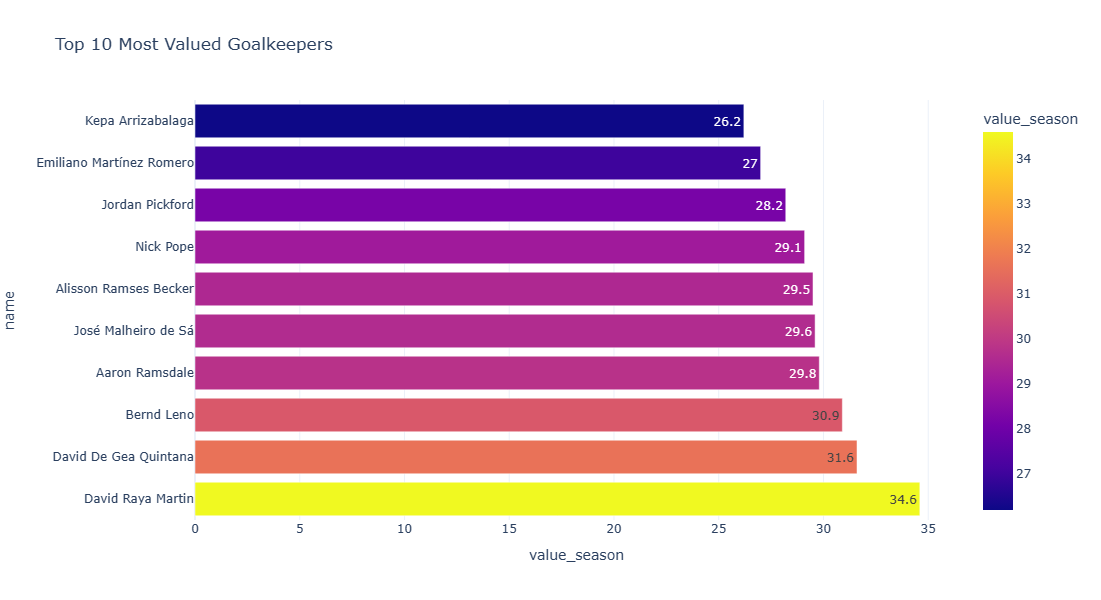

In [8]:
fig = px.bar(value_goalkeepers, x='value_season', y='name', color='value_season', hover_data={'cost', 'team', 'position'}, text='value_season',
            title='Top 10 Most Valued Goalkeepers', template='plotly_white')
fig.update_layout(height=600)
fig.show()

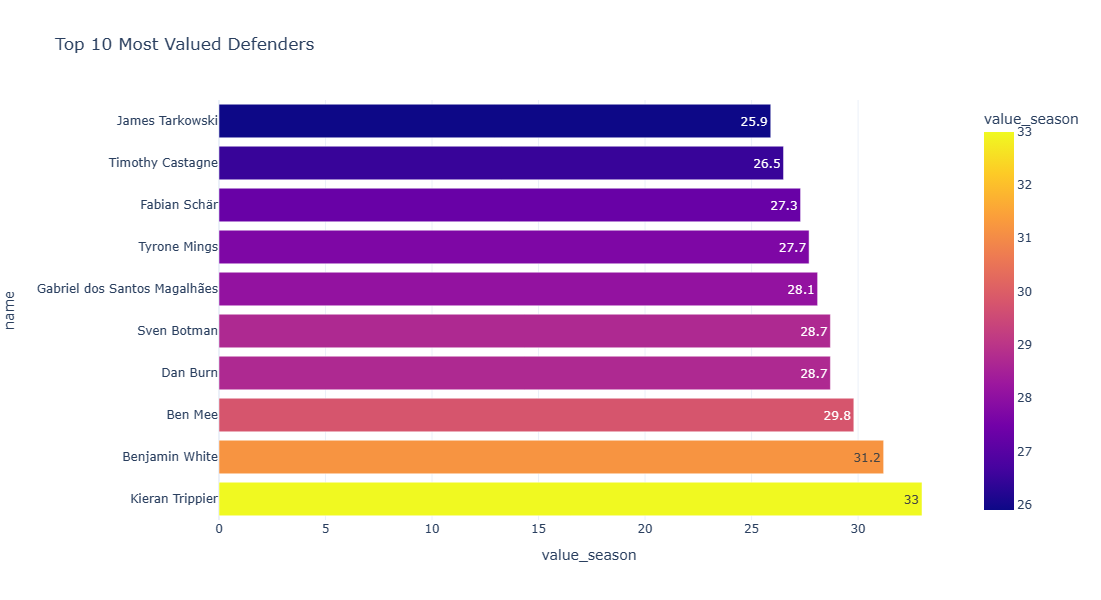

In [9]:
fig = px.bar(value_defenders, x='value_season', y='name', color='value_season', hover_data={'cost', 'team', 'position'}, text='value_season',
            title='Top 10 Most Valued Defenders', template='plotly_white')
fig.update_layout(height=600)
fig.show()

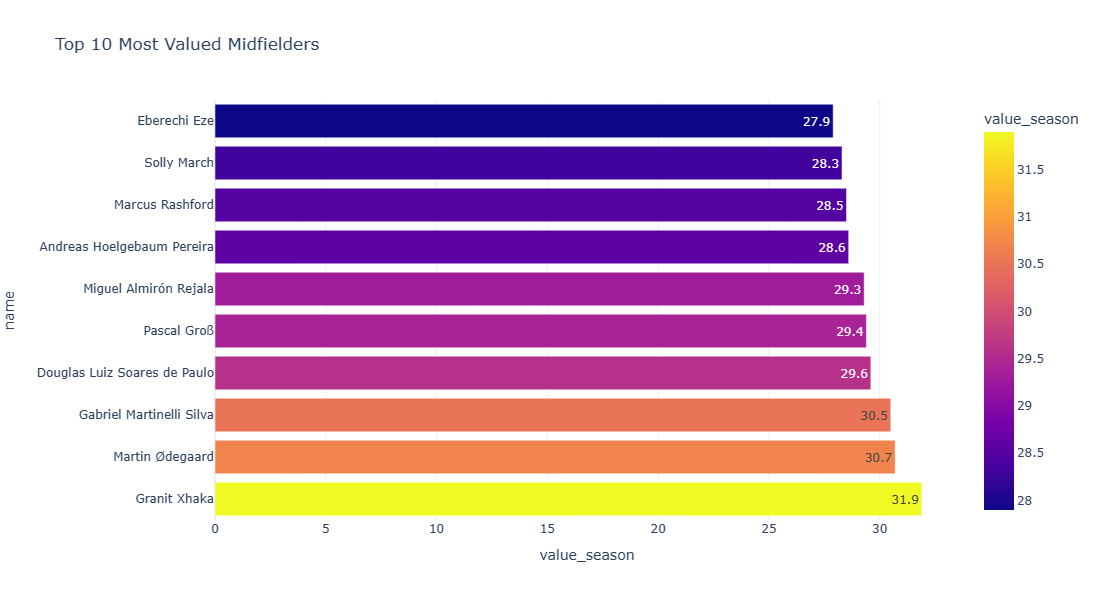

In [10]:
fig = px.bar(value_midfielders, x='value_season', y='name', color='value_season', hover_data={'cost', 'team', 'position'}, text='value_season',
            title='Top 10 Most Valued Midfielders', template='plotly_white')
fig.update_layout(height=600)
fig.show()

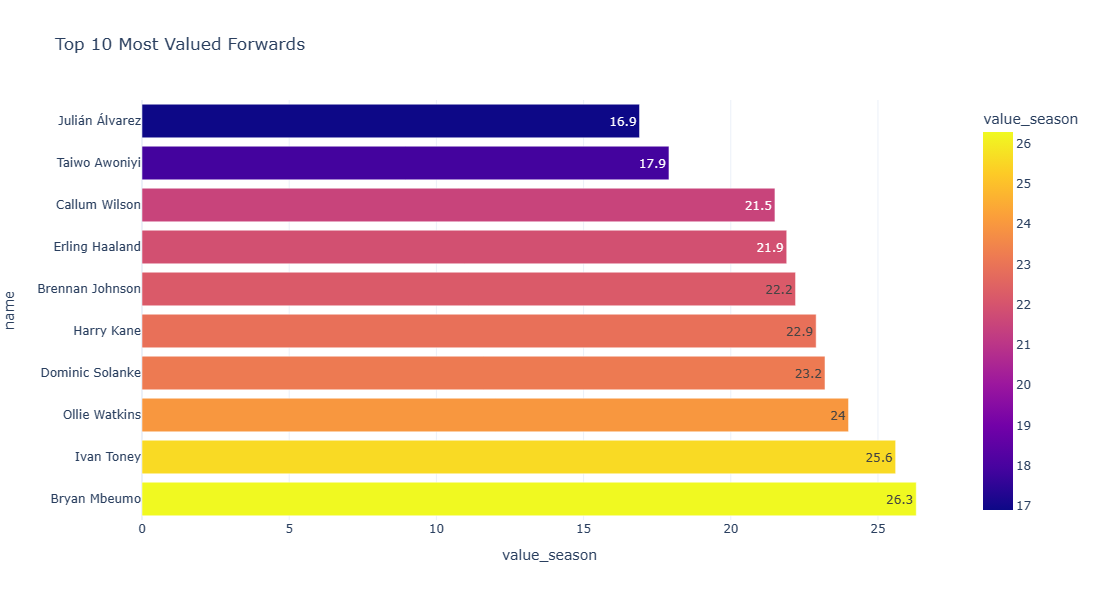

In [11]:
fig = px.bar(value_forwards, x='value_season', y='name', color='value_season', hover_data={'cost', 'team', 'position'}, text='value_season',
            title='Top 10 Most Valued Forwards', template='plotly_white')
fig.update_layout(height=600)
fig.show()

In [12]:
exp_goals = fpl_avg_players.sort_values('goals_scored', ascending=False).head(10)
exp_goals.head()

,id,name,now_cost,cost,position,team,clean_sheets_per_90,threat_rank_type,expected_assists_per_90,expected_assists,...,threat_rank,ep_this,transfers_in,bps,goals_conceded_per_90,selected_by_percent,influence_rank_type,points_per_game_rank_type,clean_sheets,now_cost_rank
1,318,Erling Haaland,124,12.4,FWD,Man City,0.42,1,0.10,3.11,...,1,5.4,7833248,1040,0.85,78.4,1,1,13,2
3,427,Harry Kane,115,11.5,FWD,Spurs,0.29,2,0.11,4.01,...,2,9.2,7381740,1008,1.64,32.7,2,2,11,4
9,80,Ivan Toney,71,7.1,FWD,Brentford,0.30,5,0.11,3.72,...,8,0.0,10688278,607,1.28,18.2,3,3,10,38
4,283,Mohamed Salah,131,13.1,MID,Liverpool,0.36,1,0.19,7.03,...,3,9.3,6974743,651,1.23,37.2,1,1,13,1
13,356,Callum Wilson,73,7.3,FWD,Newcastle,0.48,9,0.10,2.11,...,14,7.3,4424113,526,0.77,17.2,5,4,10,29


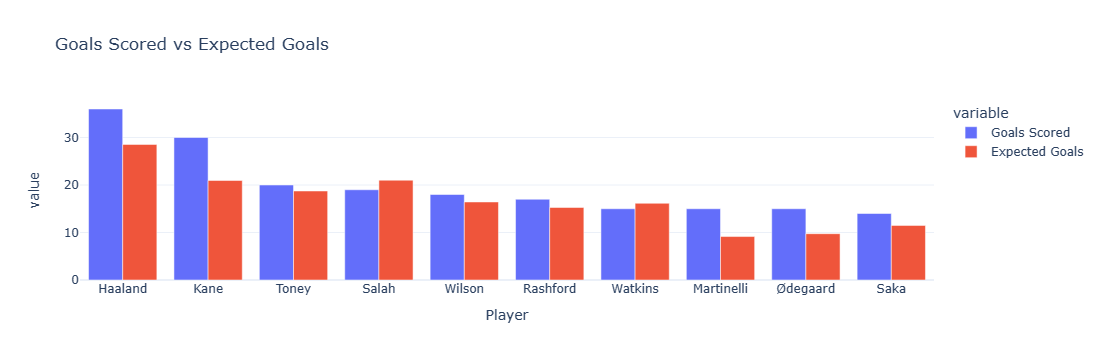

In [13]:
fig = px.bar(exp_goals, x='web_name', y=['goals_scored', 'expected_goals'], barmode='group', title='Goals Scored vs Expected Goals', 
             template='plotly_white',
             labels={'web_name': 'Player'})

newnames = {'goals_scored':'Goals Scored', 'expected_goals': 'Expected Goals'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig.show()

In [14]:
min_20_starts = fpl_data[fpl_data['starts'] >= 20]
min_20_starts.head()

,id,name,now_cost,cost,position,team,clean_sheets_per_90,threat_rank_type,expected_assists_per_90,expected_assists,...,threat_rank,ep_this,transfers_in,bps,goals_conceded_per_90,selected_by_percent,influence_rank_type,points_per_game_rank_type,clean_sheets,now_cost_rank
1,318,Erling Haaland,124,12.4,FWD,Man City,0.42,1,0.10,3.11,...,1,5.4,7833248,1040,0.85,78.4,1,1,13,2
3,427,Harry Kane,115,11.5,FWD,Spurs,0.29,2,0.11,4.01,...,2,9.2,7381740,1008,1.64,32.7,2,2,11,4
4,283,Mohamed Salah,131,13.1,MID,Liverpool,0.36,1,0.19,7.03,...,3,9.3,6974743,651,1.23,37.2,1,1,13,1
5,335,Marcus Rashford,72,7.2,MID,Man Utd,0.41,2,0.09,2.86,...,4,2.7,10735832,530,1.22,37.8,7,2,13,33
6,301,Kevin De Bruyne,121,12.1,MID,Man City,0.37,27,0.51,13.69,...,44,1.7,7222275,742,0.86,25.5,5,4,10,3


In [15]:
ppg = min_20_starts.sort_values("points_per_game", ascending=False).head(20)
ppg.head()

,id,name,now_cost,cost,position,team,clean_sheets_per_90,threat_rank_type,expected_assists_per_90,expected_assists,...,threat_rank,ep_this,transfers_in,bps,goals_conceded_per_90,selected_by_percent,influence_rank_type,points_per_game_rank_type,clean_sheets,now_cost_rank
1,318,Erling Haaland,124,12.4,FWD,Man City,0.42,1,0.10,3.11,...,1,5.4,7833248,1040,0.85,78.4,1,1,13,2
3,427,Harry Kane,115,11.5,FWD,Spurs,0.29,2,0.11,4.01,...,2,9.2,7381740,1008,1.64,32.7,2,2,11,4
4,283,Mohamed Salah,131,13.1,MID,Liverpool,0.36,1,0.19,7.03,...,3,9.3,6974743,651,1.23,37.2,1,1,13,1
5,335,Marcus Rashford,72,7.2,MID,Man Utd,0.41,2,0.09,2.86,...,4,2.7,10735832,530,1.22,37.8,7,2,13,33
6,301,Kevin De Bruyne,121,12.1,MID,Man City,0.37,27,0.51,13.69,...,44,1.7,7222275,742,0.86,25.5,5,4,10,3


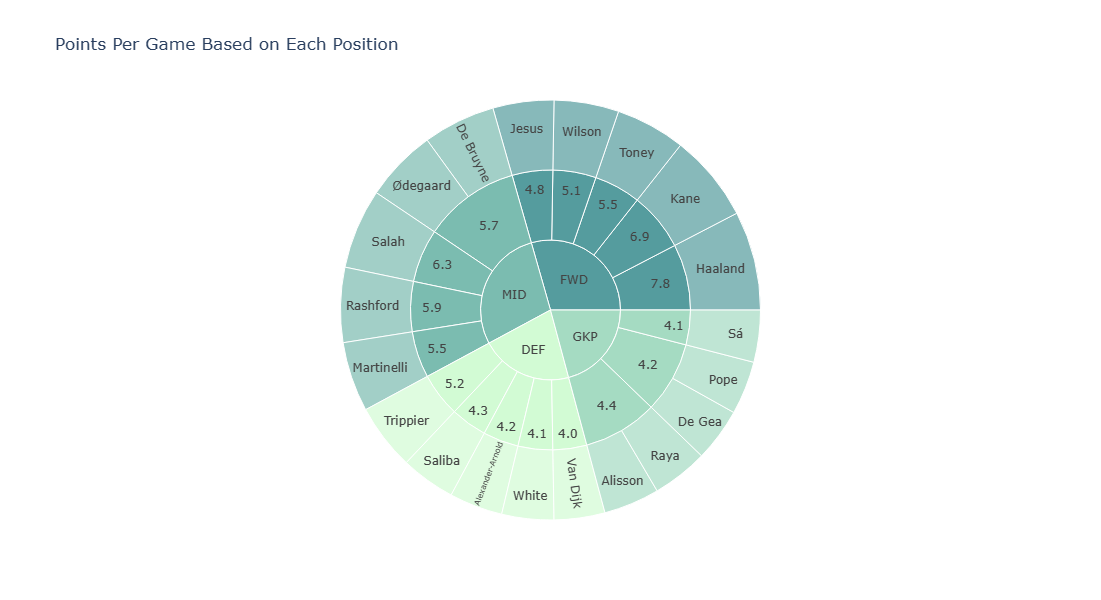

In [16]:
def top_5_ppg_pos(group):
    return group.sort_values("points_per_game", ascending=False).head(5)
pos_ppg = min_20_starts.groupby("position", group_keys=False).apply(top_5_ppg_pos)
pos_ppg.reset_index(drop=True, inplace=True)
fig = px.sunburst(pos_ppg, path=["position", "points_per_game", "web_name"],
            values="points_per_game",
            color="position", color_discrete_sequence=px.colors.sequential.Darkmint,
            hover_data = {'cost', 'team', 'total_points'},
           title="Points Per Game Based on Each Position")
fig.update_layout(width=600, height = 600)
fig.show()

In [17]:
top_assists = fpl_avg_players.sort_values(by='assists', ascending=False).head(10)
top_assists.head()

,id,name,now_cost,cost,position,team,clean_sheets_per_90,threat_rank_type,expected_assists_per_90,expected_assists,...,threat_rank,ep_this,transfers_in,bps,goals_conceded_per_90,selected_by_percent,influence_rank_type,points_per_game_rank_type,clean_sheets,now_cost_rank
6,301,Kevin De Bruyne,121,12.1,MID,Man City,0.37,27,0.51,13.69,...,44,1.7,7222275,742,0.86,25.5,5,4,10,3
4,283,Mohamed Salah,131,13.1,MID,Liverpool,0.36,1,0.19,7.03,...,3,9.3,6974743,651,1.23,37.2,1,1,13,1
30,111,Leandro Trossard,66,6.6,MID,Arsenal,0.32,11,0.24,6.02,...,22,2.6,5012558,494,1.53,7.2,28,14,8,49
37,303,Riyad Mahrez,75,7.5,MID,Man City,0.28,34,0.25,5.22,...,57,5.9,2792148,470,1.08,8.9,44,20,6,26
11,13,Bukayo Saka,80,8.0,MID,Arsenal,0.34,4,0.17,5.97,...,9,2.6,6134396,678,1.19,25.6,2,6,12,18


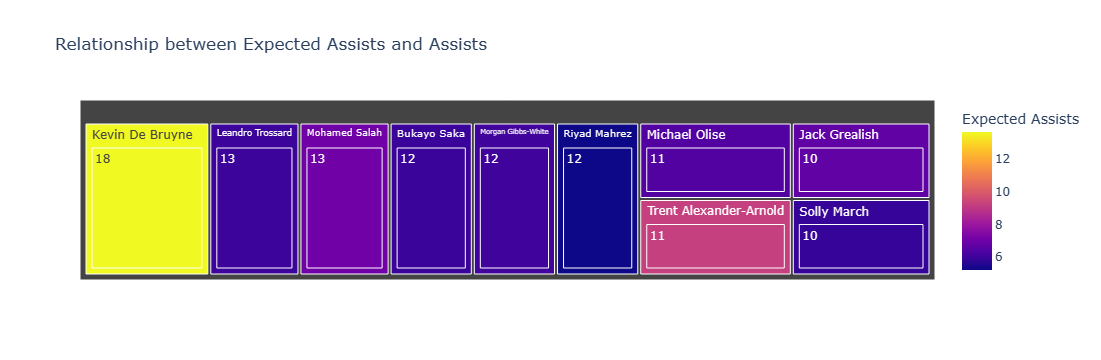

In [18]:
fig = px.treemap(top_assists, path=['name', 'assists'], values='assists', color='expected_assists',
                 title='Relationship between Expected Assists and Assists',
                 labels={'expected_assists': 'Expected Assists', 'assists': 'Assists'})

fig.show()

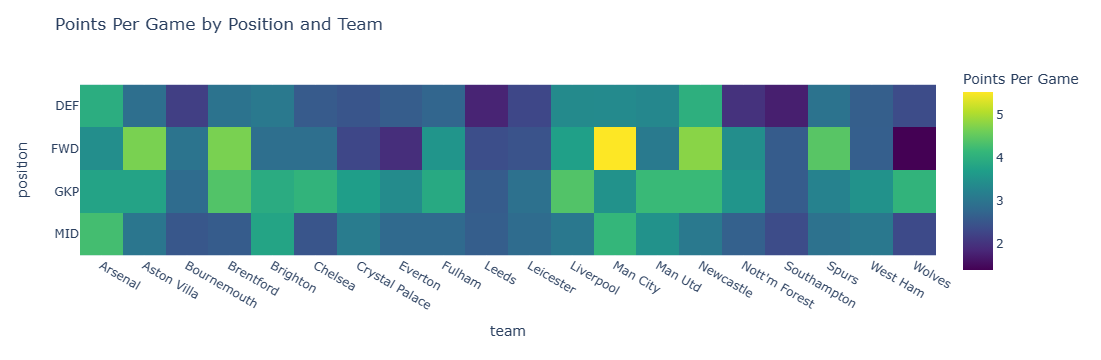

In [19]:
ppg_heatmap = fpl_avg_players.pivot_table(values='points_per_game', index='position', columns='team', aggfunc='mean')

fig = px.imshow(ppg_heatmap, labels=dict(color='Points Per Game'),
                x=ppg_heatmap.columns, y=ppg_heatmap.index,
                color_continuous_scale='Viridis')

fig.update_layout(title='Points Per Game by Position and Team')
fig.show()